In [134]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as Rsquared
from sklearn.linear_model import Lasso

In [2]:
import os
os.getcwd()

'C:\\Users\\USER'

In [3]:
os.chdir('C:\\Users\\USER\\Documents\\python_works')

In [4]:
df = pd.read_csv('Student_recruitment.csv')

In [5]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df = df.dropna(axis=0)

In [8]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 213
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           148 non-null    int64  
 1   gender          148 non-null    object 
 2   ssc_p           148 non-null    float64
 3   ssc_b           148 non-null    object 
 4   hsc_p           148 non-null    float64
 5   hsc_b           148 non-null    object 
 6   hsc_s           148 non-null    object 
 7   degree_p        148 non-null    float64
 8   degree_t        148 non-null    object 
 9   workex          148 non-null    object 
 10  etest_p         148 non-null    float64
 11  specialisation  148 non-null    object 
 12  mba_p           148 non-null    float64
 13  status          148 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 18.5+ KB


In [10]:
scale = pre.LabelEncoder()

In [11]:
df.columns.unique

<bound method Index.unique of Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')>

In [12]:
df = df.drop('status', axis = 1)

In [13]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0


In [14]:
df = df.set_index('sl_no')

In [15]:
a = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
for i in a:
    b = df[i].unique()
    d = print(b)
d

['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']


In [16]:
b = ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation']
for i in b:
    df[i] = scale.fit_transform(df[i])

In [17]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
sl_no,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,270000.0
2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,200000.0
3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,250000.0
5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,425000.0
8,1,82.00,0,64.00,0,Science,66.00,Sci&Tech,1,67.0,0,62.14,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,62.00,0,72.00,0,Commerce,65.00,Comm&Mgmt,0,67.0,0,56.49,216000.0
211,1,80.60,1,82.00,1,Commerce,77.60,Comm&Mgmt,0,91.0,0,74.49,400000.0
212,1,58.00,1,60.00,1,Science,72.00,Sci&Tech,0,74.0,0,53.62,275000.0


In [18]:
df = pd.get_dummies(df, drop_first = True)

In [19]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,270000.0,1,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,200000.0,0,1,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,250000.0,0,0,0,0
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,425000.0,1,0,0,0
8,1,82.00,0,64.00,0,66.00,1,67.0,0,62.14,252000.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,62.00,0,72.00,0,65.00,0,67.0,0,56.49,216000.0,1,0,0,0
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,400000.0,1,0,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,275000.0,0,1,0,1


In [20]:
x = df.drop('salary', axis =1)

In [21]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,1,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,0,0,0,0
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,0,0
8,1,82.00,0,64.00,0,66.00,1,67.0,0,62.14,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,62.00,0,72.00,0,65.00,0,67.0,0,56.49,1,0,0,0
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,1,0,1


In [22]:
y = df['salary']

In [23]:
y

sl_no
1      270000.0
2      200000.0
3      250000.0
5      425000.0
8      252000.0
         ...   
210    216000.0
211    400000.0
212    275000.0
213    295000.0
214    204000.0
Name: salary, Length: 148, dtype: float64

In [24]:
scaler = pre.StandardScaler()

In [25]:
for i in x.columns:
    x[i] = scaler.fit_transform(x[[i]])

In [26]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,
1,0.692820,-0.543577,1.055597,2.266523,0.791438,-1.653401,-0.872872,-1.332910,1.338825,-0.644434,0.934568,-0.860916,-0.186989,1.615474
2,0.692820,0.875956,-0.947331,0.903820,0.791438,1.345354,1.145644,0.969238,-0.746924,0.631000,-1.070013,1.161553,-0.186989,1.615474
3,0.692820,-0.773834,-0.947331,-0.207208,-1.263523,-0.729760,-0.872872,0.128771,-0.746924,-0.814947,-1.070013,-0.860916,-0.186989,-0.619013
5,0.692820,1.620837,-0.947331,0.395092,-1.263523,0.701884,-0.872872,1.722004,-0.746924,-1.207126,0.934568,-0.860916,-0.186989,-0.619013
8,0.692820,1.183349,-0.947331,-0.637422,-1.263523,-0.421879,1.145644,-0.455901,-0.746924,-0.074922,-1.070013,1.161553,-0.186989,1.615474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.692820,-1.119220,-0.947331,0.223006,-1.263523,-0.575820,-0.872872,-0.455901,-0.746924,-1.038318,0.934568,-0.860916,-0.186989,-0.619013
211,0.692820,1.022169,1.055597,1.298542,0.791438,1.363827,-0.872872,1.298116,-0.746924,2.030909,0.934568,-0.860916,-0.186989,-0.619013
212,0.692820,-1.579733,1.055597,-1.067636,0.791438,0.501762,-0.872872,0.055687,-0.746924,-1.527689,-1.070013,1.161553,-0.186989,1.615474


In [27]:
y = np.log(df['salary'])

In [110]:
model = LinearRegression()

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .15, random_state = 12)

In [112]:
model = model.fit(X_train, y_train)
model

LinearRegression()

In [113]:
y_pred= model.predict(X_test)

In [114]:
model.score(X_train, y_train)

0.1955647235740804

In [115]:
MSE(np.exp(y_test), np.exp(y_pred))

10313737053.72884

In [116]:
Rsquared(np.exp(y_test), np.exp(y_pred))

-0.05518130844486002

In [35]:
import statsmodels.api as sm

In [36]:
x = sm.add_constant(x)

In [37]:
x

,const,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,
1,1.0,0.692820,-0.543577,1.055597,2.266523,0.791438,-1.653401,-0.872872,-1.332910,1.338825,-0.644434,0.934568,-0.860916,-0.186989,1.615474
2,1.0,0.692820,0.875956,-0.947331,0.903820,0.791438,1.345354,1.145644,0.969238,-0.746924,0.631000,-1.070013,1.161553,-0.186989,1.615474
3,1.0,0.692820,-0.773834,-0.947331,-0.207208,-1.263523,-0.729760,-0.872872,0.128771,-0.746924,-0.814947,-1.070013,-0.860916,-0.186989,-0.619013
5,1.0,0.692820,1.620837,-0.947331,0.395092,-1.263523,0.701884,-0.872872,1.722004,-0.746924,-1.207126,0.934568,-0.860916,-0.186989,-0.619013
8,1.0,0.692820,1.183349,-0.947331,-0.637422,-1.263523,-0.421879,1.145644,-0.455901,-0.746924,-0.074922,-1.070013,1.161553,-0.186989,1.615474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,0.692820,-1.119220,-0.947331,0.223006,-1.263523,-0.575820,-0.872872,-0.455901,-0.746924,-1.038318,0.934568,-0.860916,-0.186989,-0.619013
211,1.0,0.692820,1.022169,1.055597,1.298542,0.791438,1.363827,-0.872872,1.298116,-0.746924,2.030909,0.934568,-0.860916,-0.186989,-0.619013
212,1.0,0.692820,-1.579733,1.055597,-1.067636,0.791438,0.501762,-0.872872,0.055687,-0.746924,-1.527689,-1.070013,1.161553,-0.186989,1.615474


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = .15, random_state = 12)

In [40]:
model = sm.OLS(y_train, X_train).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.910
Date:                Wed, 24 May 2023   Prob (F-statistic):             0.0326
Time:                        07:46:26   Log-Likelihood:                 14.129
No. Observations:                 125   AIC:                             1.742
Df Residuals:                     110   BIC:                             44.17
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.5326      0.021    604.610      0.000      12.492      12.574
gender                0.0595      0.024      2.519      0.013       0.013       0.106
ssc_p                -0.0062      0.027     -0.229      0.820      -0.060       0.048
ssc_b                 0.0198      0.030      0.665      0.507      -0.039       0.079
hsc_p                -0.0199      0.028     -0.700      0.486      -0.076       0.036
hsc_b                -0.0318      0.029     -1.096      0.276      -0.089       0.026
degree_p             -0.0317      0.025     -1.246      0.215      -0.082       0.019
workex                0.0064      0.022      0.291      0.771      -0.037       0.050
etest_p               0.0221      0.024      0.909      0.365      -0.026       0.070
specialisation       -0.0229      0.023     -1.014      0.313      -0.068       0.022
mba_p                 0.0593      0.027      2.214      0.029       0.006       0.112
hsc_s_Commerce        0.0899      0.056      1.597      0.113      -0.022       0.201
hsc_s_Science         0.0640      0.061      1.047      0.297      -0.057       0.185
degree_t_Others       0.0252      0.022      1.128      0.262      -0.019       0.070
degree_t_Sci&Tech     0.0575      0.031      1.877      0.063      -0.003       0.118
==============================================================================
Omnibus:                       51.187   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.073
Skew:                           1.520   Prob(JB):                     7.80e-35
Kurtosis:                       7.574   Cond. No.                         6.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
np.exp(model.predict(X_test))

sl_no
211    309727.712659
188    347057.478213
70     341871.973606
143    289249.845748
33     237072.539548
25     324451.008007
138    279231.866957
210    280551.261066
213    302767.872532
198    252964.472010
36     239730.099991
178    246627.092409
205    265417.120057
115    226648.554030
104    312109.760163
93     244678.747637
175    342449.438830
38     242505.524689
206    278201.747956
173    275253.204605
62     287283.898995
89     246267.131534
181    264784.904661
dtype: float64

In [65]:
np.exp(y_test)

sl_no
211    400000.0
188    280000.0
70     275000.0
143    260000.0
33     278000.0
25     360000.0
138    225000.0
210    216000.0
213    295000.0
198    260000.0
36     300000.0
178    650000.0
205    210000.0
115    250000.0
104    240000.0
93     230000.0
175    500000.0
38     320000.0
206    250000.0
173    300000.0
62     300000.0
89     210000.0
181    265000.0
Name: salary, dtype: float64

In [50]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,270000.0,1,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,200000.0,0,1,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,250000.0,0,0,0,0
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,425000.0,1,0,0,0
8,1,82.00,0,64.00,0,66.00,1,67.0,0,62.14,252000.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,62.00,0,72.00,0,65.00,0,67.0,0,56.49,216000.0,1,0,0,0
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,400000.0,1,0,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,275000.0,0,1,0,1


In [51]:
import matplotlib.pyplot as plt

([<matplotlib.lines.Line2D at 0x28ea4649e20>],
 <matplotlib.collections.PathCollection at 0x28ea4656430>)

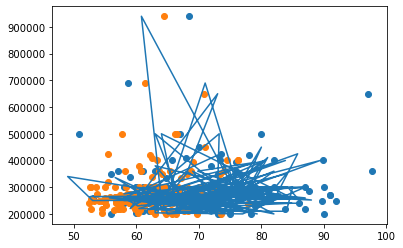

In [62]:
plt.plot(df.ssc_p, df.salary), plt.scatter(df.hsc_p, df.salary), plt.scatter(df.mba_p, df.salary)

## Insght: 
    Linear Regression model is not good for this dataset.

# RIDGE REGRESSION

In [133]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
parameters={'alpha':[10**i for i in range(-5,20)]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=7)
ridge_regressor.fit(x,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-0.058581049478164775


In [119]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [136]:
rr = Ridge(alpha = 100)

In [137]:
model = rr.fit(X_train, y_train)

In [138]:
model.intercept_

12.53166514917064

In [139]:
model.coef_

array([ 0.00000000e+00,  3.21850015e-02,  1.39291619e-05,  5.21888963e-03,
       -3.73190357e-03, -1.01875432e-02, -1.17016045e-02,  8.47046776e-03,
        1.81787585e-02, -1.25991311e-02,  2.01031173e-02,  6.37088040e-03,
        4.71032612e-03,  4.74625118e-03,  2.67944874e-02])

In [140]:
y_pred = model.predict(X_test)

In [141]:
Rsquared(y_test, y_pred)

0.05006272548064716

In [142]:
model.score(X_train,y_train)

0.1380746133253733

In [143]:
model.score(X_test,y_test)

0.05006272548064716

# LASSO REGRESSION

In [144]:
las = Lasso()

In [192]:
parameter = {'alpha': [10**i for i in range(-5,20)]}
Las_reg = GridSearchCV(las, parameter, cv = 10, scoring = 'neg_mean_squared_error')
Las_reg.fit(x,y)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000, 10000, 100000, 1000000, 10000000,
                                   100000000, 1000000000, 10000000000,
                                   100000000000, 1000000000000, 10000000000000,
                                   100000000000000, 1000000000000000,
                                   10000000000000000, 100000000000000000,
                                   1000000000000000000, 10000000000000000000]},
             scoring='neg_mean_squared_error')

In [193]:
print(Las_reg.best_params_)
print(Las_reg.best_score_)

{'alpha': 0.01}
-0.05833372238648593


In [194]:
model = Lasso(alpha = 3000000, normalize=False,)

In [195]:
modell = model.fit(X_train, y_train)
print(modell.score(X_train, y_train))

0.0


In [196]:
print(modell.score(X_test, y_test))

-0.016903110096990304


In [197]:
modell.intercept_

12.532311149827764

In [198]:
model.coef_

array([ 0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,
       -0.,  0.])